# Multivariate Analysis Using NHANES Data
Performing multivariate analysis

[NHANES](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI2) data description

In [1]:
# imports 
import numpy as np 
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
from pathlib import Path 

In [2]:
# impor DataFrame 
df = pd.read_csv(Path('data/nhanes_2015_2016.csv'))
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


## Scatterplot and Correlation Matrix
`BPXDI1` & `BPXDI2` represent the first two measurements of diastolic blood pressure respectively

`BPXSY1` & `BPXSY2` represent the first two measurements of systolic blood pressure respectively

`RIDRETH1` represents the race-ethnicity variable

`RIAGENDR` represents gender

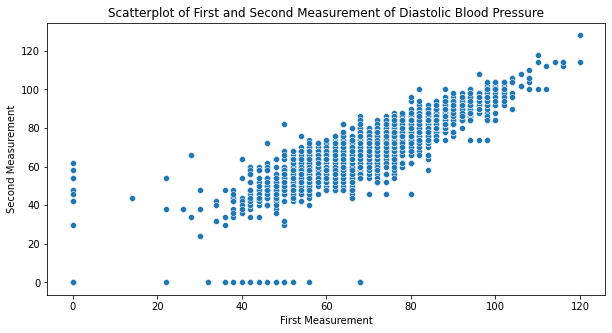

In [3]:
# Relationship between first and second measurement of diastolic blood pressure (`BPXDI1` & `BPXDI2')
fig = plt.figure(figsize=(10,5))
fig = sns.scatterplot(x=df['BPXDI1'], y=df['BPXDI2'])
plt.title('Scatterplot of First and Second Measurement of Diastolic Blood Pressure')
plt.xlabel('First Measurement')
plt.ylabel('Second Measurement')
plt.show(fig)

The scatterplot shows strong positive correlation between the first and second measurements of diastolic blood pressure. If the first measurement is hight, the second one is also high. The graph is leaning towards the top right. 

In [4]:
# correlation matrix between the first two systolic and the first two diastolic blood pressure
corr_matrix = df[['BPXDI1','BPXDI2','BPXSY1','BPXSY2']].dropna().corr()
corr_matrix

,BPXDI1,BPXDI2,BPXSY1,BPXSY2
BPXDI1,1.000000,0.884722,0.317497,0.329843
BPXDI2,0.884722,1.000000,0.277681,0.298392
BPXSY1,0.317497,0.277681,1.000000,0.962287
BPXSY2,0.329843,0.298392,0.962287,1.000000


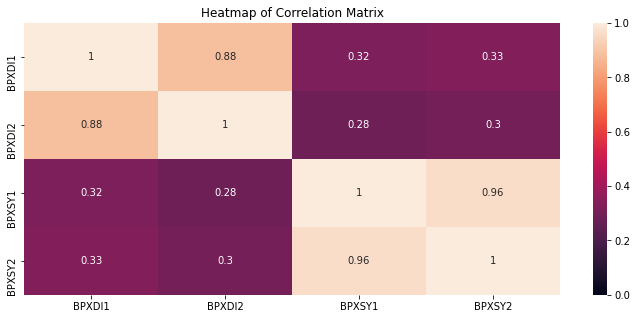

In [5]:
# Visualize Correlation Matrix
fig = plt.figure(figsize=(12,5))
fig = sns.heatmap(corr_matrix, vmin=0, vmax=1, annot=True )
plt.title('Heatmap of Correlation Matrix')
plt.show(fig)

Both the correllation matrix and heatmap show that the correlation between the first two readings of diastolic and systolic measurent is weak. For example the correlation between `BPXDI1` and `BPXSY1` is only 0.32.

## Scatterplot and Correlation of Subgroups

In [6]:
# Rename gender and ethinicity column
df.rename(columns=({'RIAGENDR':'GENDER', 'RIDRETH1':'ETHNICITY'}), inplace = True)

# Replace gender code with 1=Male, 2=Female
df['GENDER'] = df['GENDER'].replace({1:'Male',2:'Female'})

# Replace race/ethicity codes with meaninful value 
df['ETHNICITY'] = df['ETHNICITY'].replace({1:'Mexican American',
                                         2:'Other Hispanic',
                                         3:'Non-Hispanic White',
                                         4:'Non-Hispanic Black',
                                         5:'Other Race - Including Multi-Racial',
                                         6:np.nan})

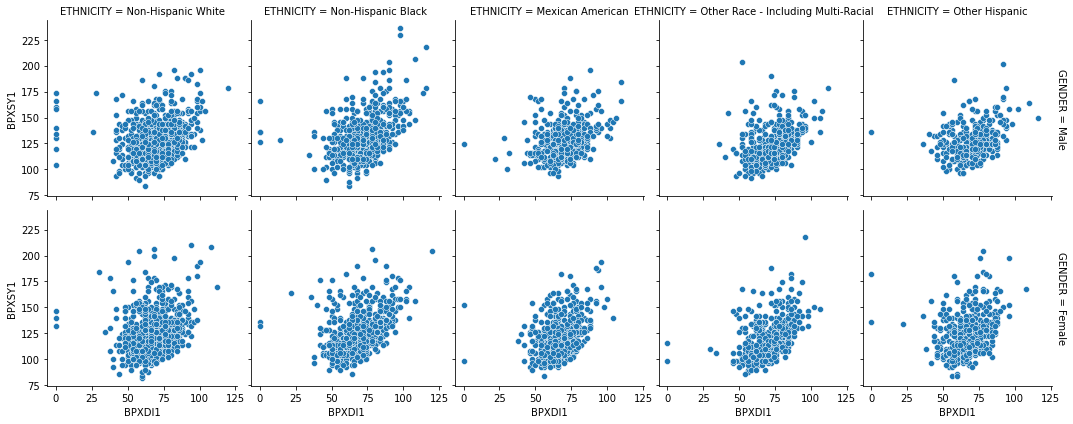

In [7]:
# Scatterplot of First distolic and systolic BP measurement stratified by gender and ethicity
# RIDRETH1 represents the race-ethnicity variable
# BPXDI1 - First diastolic blood pressure measurement
# BPXSY1 - first systolic bloood pressure measurement
g = sns.FacetGrid(data=df, row='GENDER', col='ETHNICITY', margin_titles=True)
g.map(sns.scatterplot, 'BPXDI1', 'BPXSY1')
plt.show()

The correlation between the first distolic and systolic blood pressure have a positive correllation for both the male and female population. Gender does not seem to have an impact on the measurements, if we look at the subplots the data points are clustered around the same area. 

## Mixed Categorical and Quantitative Data
[*Violinplots*](https://seaborn.pydata.org/generated/seaborn.violinplot.html) help to analyze "the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared."

In [8]:
# Rename DMDEDUC2 column to Education Level
df.rename(columns=({'DMDEDUC2':'EDUCATION_LEVEL'}), inplace=True)

# Replace eduation level codes with meaninful values
df['EDUCATION_LEVEL'] = df['EDUCATION_LEVEL'].replace({1: "Less than 9th grade", 2: "9-11 grade", 3: "HS/GED", 4: "Some college/AA", 5: "College graduate or above", 
                                       7: "Refused", 9: "Don't know"})
df['EDUCATION_LEVEL'].value_counts()

Some college/AA              1621
College graduate or above    1366
HS/GED                       1186
Less than 9th grade           655
9-11 grade                    643
Don't know                      3
Name: EDUCATION_LEVEL, dtype: int64

In [9]:
# Drop 'dont't know' Value because there only 3 responses. 
df = df[df['EDUCATION_LEVEL']!="Don't know"]
df['EDUCATION_LEVEL'].value_counts()

Some college/AA              1621
College graduate or above    1366
HS/GED                       1186
Less than 9th grade           655
9-11 grade                    643
Name: EDUCATION_LEVEL, dtype: int64

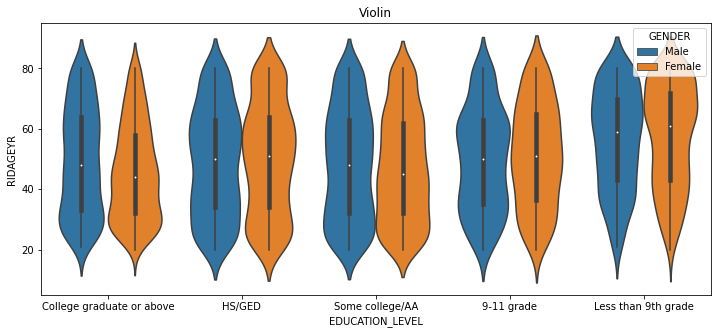

In [10]:
# Use "violin plots" to compare the distributions of ages within groups defined by gender and educational attainment.
fig = plt.figure(figsize=(12, 5))
fig = sns.violinplot(x=df['EDUCATION_LEVEL'], y = df['RIDAGEYR'], hue=df['GENDER'])
plt.title('Violin')
plt.show()

The median age of males who graduated college is higher than the female population. All age groups follow a normal dristribution for the entire population. 

In [11]:
# obtain min/max value of age column 
print(df['RIDAGEYR'].min())
print(df['RIDAGEYR'].max())

18
80


In [12]:
# Create and group data by 10 years age band 
df['AGE_GRP'] = pd.cut(df['RIDAGEYR'], pd.interval_range(start=18, end=80, freq=10))
df_small = df.loc[:,['RIDAGEYR','GENDER','BMXBMI','AGE_GRP']].copy()
df_small.head()

C:\Users\jaime\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,RIDAGEYR,GENDER,BMXBMI,AGE_GRP
0,62,Male,27.8,"(58, 68]"
1,53,Male,30.8,"(48, 58]"
2,78,Male,28.8,"(68, 78]"
3,56,Female,42.4,"(48, 58]"
4,42,Female,20.3,"(38, 48]"
